In [1]:
import numpy as np
import pickle
from sklearn.datasets import load_breast_cancer
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ncart import NCARClassifier

In [2]:
data = load_breast_cancer()  
X = data.data.astype(np.float32)
y = data.target
feature_names = data.feature_names

In [8]:
# model = NCARClassifier(epochs=100, n_trees=8, n_layers=2, n_selected=6, use_gpu=False)  # CPU
# model = NCARClassifier(epochs=100, n_trees=8, n_layers=2, n_selected=6)  # single GPU
model = NCARClassifier(epochs=100, n_trees=8, n_layers=2, n_selected=6, data_parallel=True, gpu_ids=[0, 1])  # multiple GPU
model.fit(X, y)

On Device: cuda [0, 1]
Binary classification
Epoch 0: Train Loss 0.834303
Epoch 1: Train Loss 0.829793
Epoch 2: Train Loss 0.825237
Epoch 3: Train Loss 0.820590
Epoch 4: Train Loss 0.815786
Epoch 5: Train Loss 0.811919
Epoch 6: Train Loss 0.807508
Epoch 7: Train Loss 0.803457
Epoch 8: Train Loss 0.799440
Epoch 9: Train Loss 0.795587
Epoch 10: Train Loss 0.791816
Epoch 11: Train Loss 0.787809
Epoch 12: Train Loss 0.783742
Epoch 13: Train Loss 0.780088
Epoch 14: Train Loss 0.776465
Epoch 15: Train Loss 0.773234
Epoch 16: Train Loss 0.769348
Epoch 17: Train Loss 0.766014
Epoch 18: Train Loss 0.762377
Epoch 19: Train Loss 0.759473
Epoch 20: Train Loss 0.756027
Epoch 21: Train Loss 0.752949
Epoch 22: Train Loss 0.749810
Epoch 23: Train Loss 0.746589
Epoch 24: Train Loss 0.743802
Epoch 25: Train Loss 0.740860
Epoch 26: Train Loss 0.737689
Epoch 27: Train Loss 0.734789
Epoch 28: Train Loss 0.732026
Epoch 29: Train Loss 0.729391
Epoch 30: Train Loss 0.727244
Epoch 31: Train Loss 0.723862
Epoch

([0.8343032598495483,
  0.8297925591468811,
  0.8252368569374084,
  0.8205903172492981,
  0.8157864809036255,
  0.8119186758995056,
  0.8075082898139954,
  0.8034566044807434,
  0.7994396090507507,
  0.7955874800682068,
  0.7918158769607544,
  0.7878090739250183,
  0.78374183177948,
  0.7800880670547485,
  0.7764648199081421,
  0.7732337117195129,
  0.769347608089447,
  0.7660137414932251,
  0.7623773813247681,
  0.7594730854034424,
  0.7560274600982666,
  0.7529492974281311,
  0.749809980392456,
  0.7465892434120178,
  0.7438023090362549,
  0.7408600449562073,
  0.7376894354820251,
  0.7347888946533203,
  0.7320260405540466,
  0.7293906211853027,
  0.7272441983222961,
  0.7238617539405823,
  0.7209415435791016,
  0.7183811664581299,
  0.7157901525497437,
  0.7131112217903137,
  0.7107591032981873,
  0.7076705694198608,
  0.7056251168251038,
  0.7029927372932434,
  0.7005704045295715,
  0.6979401707649231,
  0.6956139206886292,
  0.6934481859207153,
  0.6909884214401245,
  0.6887559294

In [9]:
importance = model.get_importance()

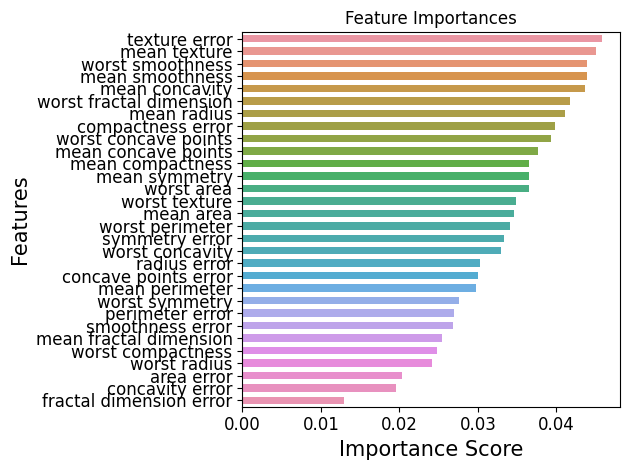

In [10]:
# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances using Seaborn
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, width=0.6)
plt.title('Feature Importances', fontsize=12)
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

In [11]:
model.predict_proba(X)

array([[0.6389415 , 0.36105844],
       [0.60689545, 0.39310458],
       [0.6470667 , 0.3529333 ],
       ...,
       [0.58750963, 0.41249034],
       [0.6767332 , 0.3232668 ],
       [0.44750613, 0.5524939 ]], dtype=float32)

In [12]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,